# Q1


## Q1.a
 Estimate an undirected graph G = ([6], E) with respect to which the data-generating distribution X factors. Draw the graph G. Be sure to explain why your method of estimation results in a graph G such that X factors with respect to G.

## Anser
Lets start with computing the inverse of the sample covariance matrix
Σ^-1



In [ ]:
import numpy as np

Sigma_hat = np.array([[0.176, -0.03, 0.004, 0.004, 0.005, -0.031],
                      [-0.03, 0.178, -0.03, 0.005, -0.002, 0.005],
                      [0.004, -0.03, 0.178, -0.031, 0.004, 0.003],
                      [0.004, 0.005, -0.031, 0.18, -0.025, -0.026],
                      [0.005, -0.002, 0.004, -0.025, 0.175, -0.026],
                      [-0.031, 0.005, 0.003, -0.026, -0.026, 0.18]])

Sigma_hat_inv = np.linalg.inv(Sigma_hat)
for line in Sigma_hat_inv:
  print(", ".join([f"{l:>5.2f}" for l in line]))



```
 6.03,  0.99,  0.01, -0.02, -0.01,  1.01
 0.99,  5.95,  0.98, -0.02,  0.01, -0.01
 0.01,  0.98,  5.96,  1.00,  0.02,  0.02
-0.02, -0.02,  1.00,  6.01,  0.98,  0.99
-0.01,  0.01,  0.02,  0.98,  6.00,  1.01
 1.01, -0.01,  0.02,  0.99,  1.01,  6.02
```



lets compute the partial correlation matrix using the formula ρ(i,j) = -r(i,j)/√(r(i,i)*r(jj))
 , we can compute the partial correlations for each pair (i,j)

In [ ]:
m = Sigma_hat.shape[0]
rho = np.zeros((m, m))

for i in range(m):
    for j in range(m):
        if i != j:
            rho[i, j] = -Sigma_hat_inv[i, j] / np.sqrt(Sigma_hat_inv[i, i] * Sigma_hat_inv[j, j])

rho
for line in rho:
  print(", ".join([f"{l:>5.2f}" for l in line]))



```
 0.00, -0.17, -0.00,  0.00,  0.00, -0.17
-0.17,  0.00, -0.16,  0.00, -0.00,  0.00
-0.00, -0.16,  0.00, -0.17, -0.00, -0.00
 0.00,  0.00, -0.17,  0.00, -0.16, -0.16
 0.00, -0.00, -0.00, -0.16,  0.00, -0.17
-0.17,  0.00, -0.00, -0.16, -0.17,  0.00
```



Compute the test statistic for each ρ(i,j) using z(t) = 1/2*log((1 + t)/(1- t)).

In [ ]:
n = 100000
z = 0.5 * np.log((1 + rho) / (1 - rho))

test_statistic = np.sqrt(n - m - 3) * np.abs(z)
reject_H0 = test_statistic > 1.96

reject_H0



```
array([[False,  True, False, False, False,  True],
       [ True, False,  True, False, False, False],
       [False,  True, False,  True, False, False],
       [False, False,  True, False,  True,  True],
       [False, False, False,  True, False,  True],
       [ True, False, False,  True,  True, False]])
```



If a value is "True", then we reject the null hypothesis H0: Xi ⊥ Xj|X[m]\{i,j} for the corresponding pair (i,j), indicating that the variables Xi and Xj are not conditionally independent given the other variables. In this case, we will draw an edge between nodes i and j in the graph G.


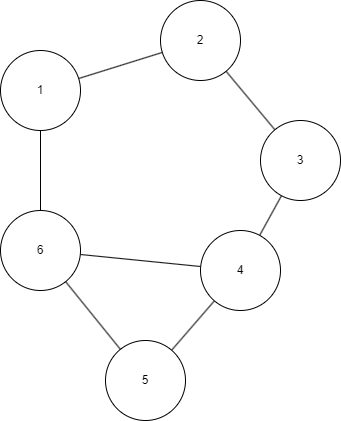

Each node represents one of the variables X1, X2,  ... , X6 and an edge between two nodes indicates that the corresponding variables are not conditionally independent given the other variables.

The graphical model, represented by the undirected graph G, encodes the conditional independence relationships among the variables. When two nodes are not connected by an edge in the graph, it suggests that the two corresponding random variables are conditionally independent given the other variables.

We asume that the underlying data is faithful and that the joint distribution of the variables factorizes according to the structure of the graph

Therefore, by constructing the graph based on the conditional independence tests, we make sure that the data distribution X is represented in G.

## Q1.b




Given the graph G, we can identify conditional independence relations using the concept of d-separation. In an undirected graph, two sets of nodes A and B are conditionally independent given a set of nodes C if every path between a node in A and a node in B is "blocked" by C. A path is "blocked" by C if some node on the path is in C or if some node on the path has neighbors that are not on the path and are not in C.

For this problem we need to find two such conditional independence relations (XA ⊥ XB | XC) from the graph such that |A|,|B|,|C| > 1.

Since we have 6 nodes, the solution will have 2 nodes in each set. This can be viewed as a way of dividing the graph such that the division consists of 2 nodes and separates two regions of 2 nodes each. The nodes in the separating set must "block" the separated sets. For example, if {2, 5} is the separating set, then on our graphical layout, {1, 6} and {3, 4} are not independent since there is a path from 6 to 4.

However, if we separate the graph with {1, 4}, we find that {6, 5} is independent of {2, 3} given {1, 4}. Similarly, if we separate the graph with {3, 6}, we get that {4, 5} is independent of {1, 2} given {3, 6}, which is what the question was asking for.

{6, 5} ⊥ {2, 3} | {1, 4}

{4, 5} ⊥ {1, 2} | {3, 6}

## Q1.c




In [ ]:
failed to load...

# Q2


## Q2.a

We can simplify the graph by reordering the node locations







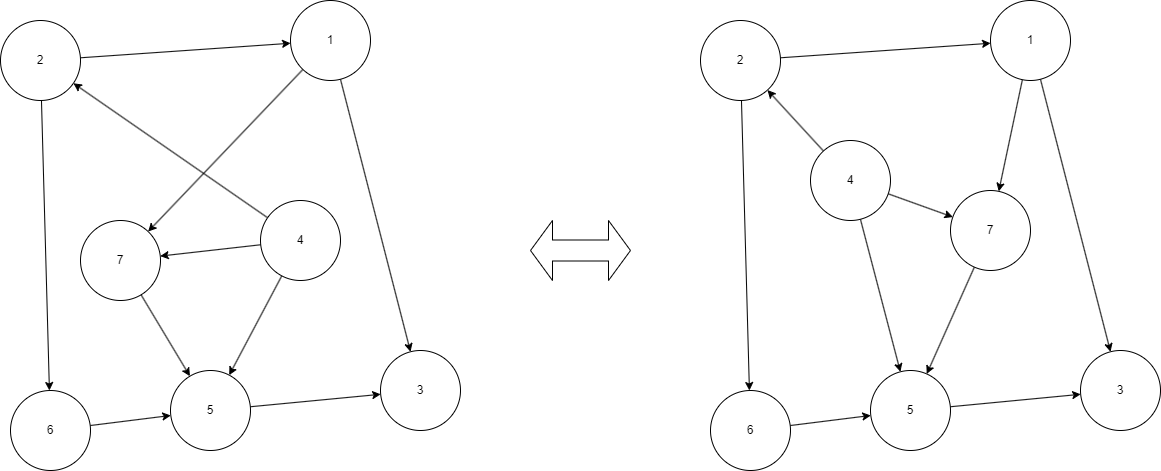


A moral graph means that if there exist two notes with the same child and an undetected edge between them shall be added (lecture notes 2), the resulting graph is undetected

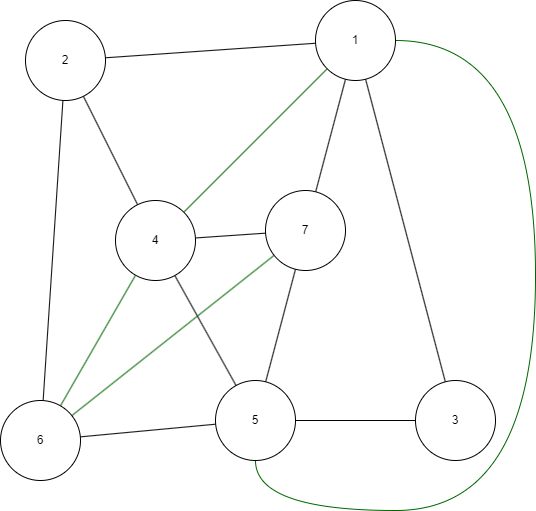

## Q2.b

A chordal (or triangulated) graph is an undirected graph in which every cycle of length four or more has a chord. The longest cycle in a chordal graph is a 3-cycle. Every subgraph induced from a chordal graph remains chordal.


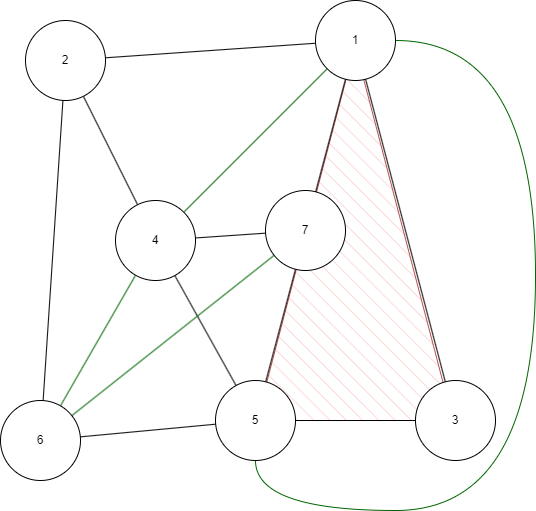

Since there exists a cycle of 4 this cant be chordal

## Q2.c

Is it true that X4 ⊥ X1 | X2?
Since the only parent to 1 is 2 is a directed acyclic graph and 4 is parent to 2 then if we remove 2 we remove the connection between 4 and 1.



## Q2.D

The induced subgraph of G given An(1, 2, 4)

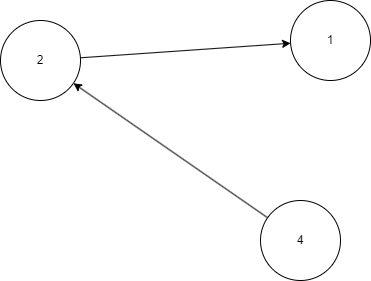

The moral graph of the induced subgraph


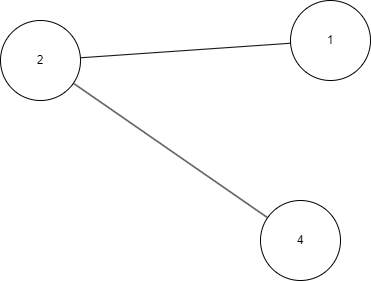

In this graph nodes 1 and 4 are separated given node 2 is removed


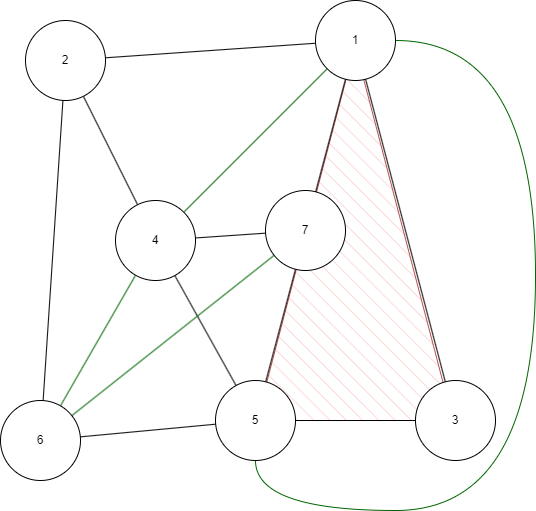

This is not the case in the original moral graph since there exist multiple paths between nodes 4 and 1 e.g. 4-1 or 4-7-1.


# Q3



## Q3.a
A v-structure is a specific configuration of three nodes where two of the nodes (parents) have arrows pointing to the third node (child), but there is no direct edge between the first two parents.


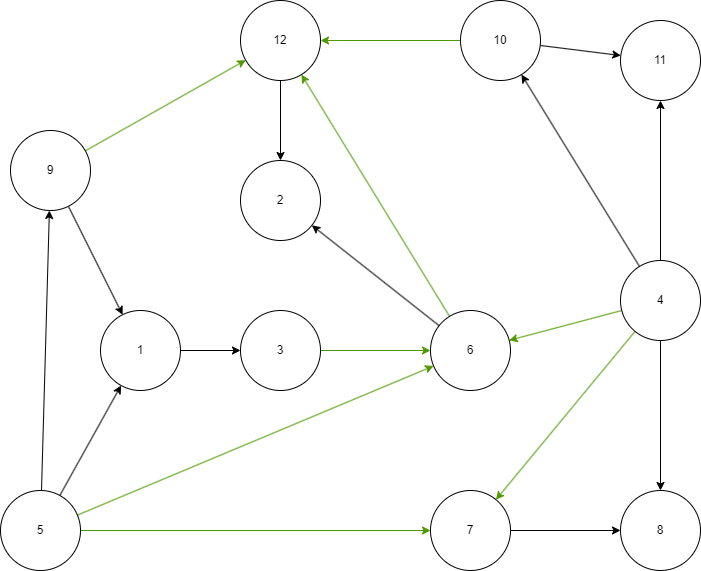

v-structures are:

9→12←10

9→12←6

6→12←10

3→6←4

3→6←5

5→6←4

5→7←4


## Q3.b

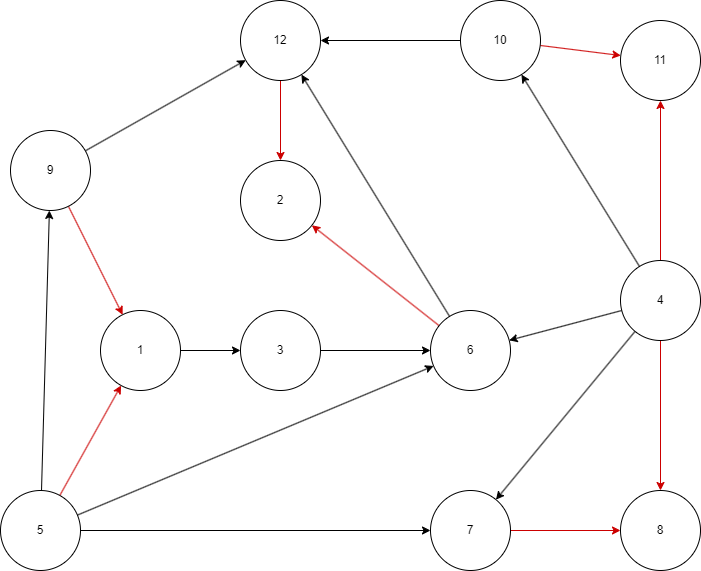

A path  i, j, k i in G for which i → j, k → j ∈ E that is not a v-structure if i → k or k → i. e.g.

9→1←5

12→2←6

10→11←4

7→8←4


## Q3.c

An essential graph is a partially directed graph representing DAGs with identical conditional independence relationships. It keeps consistent edge directions from these DAGs and uses undirected edges where directionality varies. The graph ensures all v-structures are preserved without introducing or breaking any.


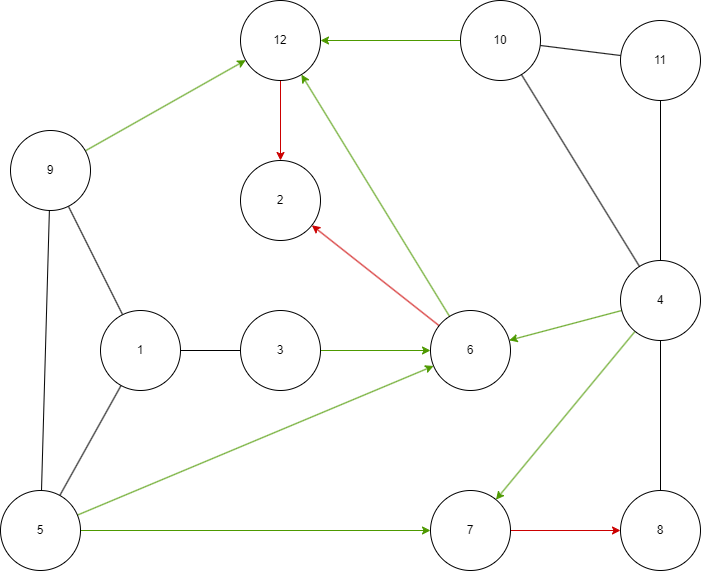

Green edges in the graph maintain v-structures, while red edges are imposed to prevent the addition or disruption of v-structures and prevent intruduction of cycels.


## Q3.d
A Markov equivalence class consists of DAGs that share the same undirected edges (skeleton) and have identical v-structures.

Let's examine the subgraphs {4,8,10,11} and {1,3,5,9}. We must account for all configurations of these subgraphs to ensure no new v-structures are introduced.


{4,8,10,11}

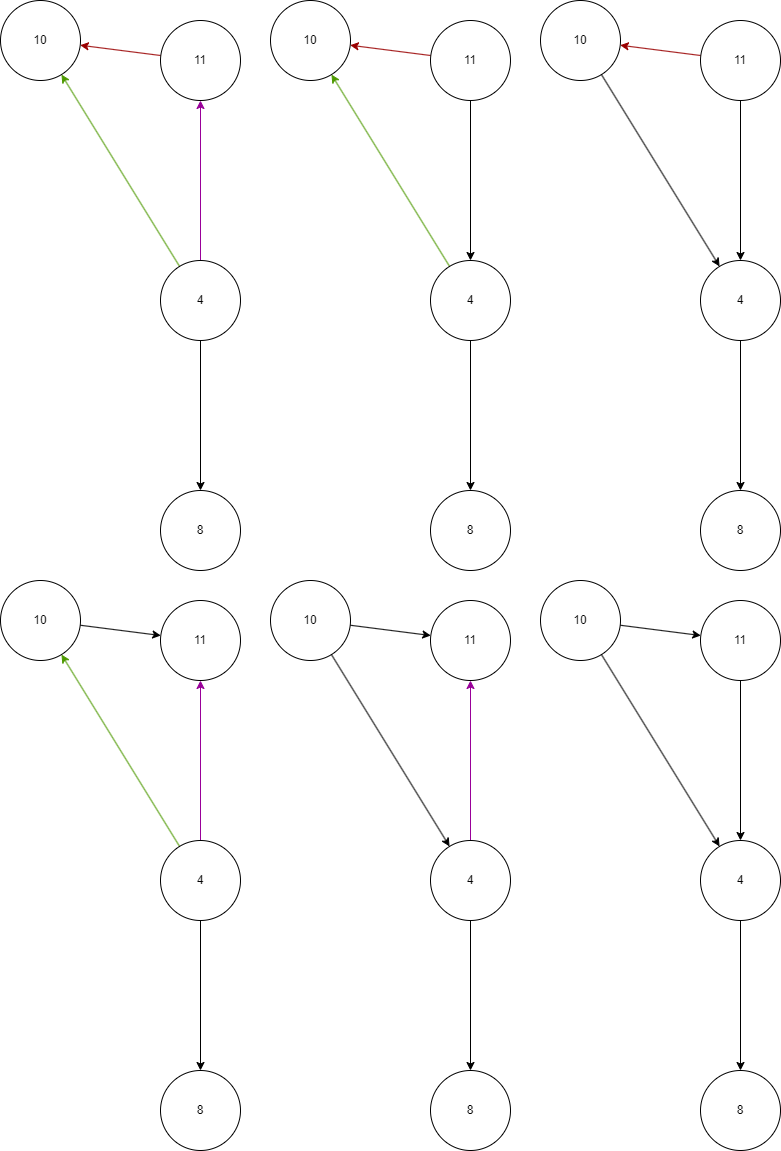

{1,3,5,9}
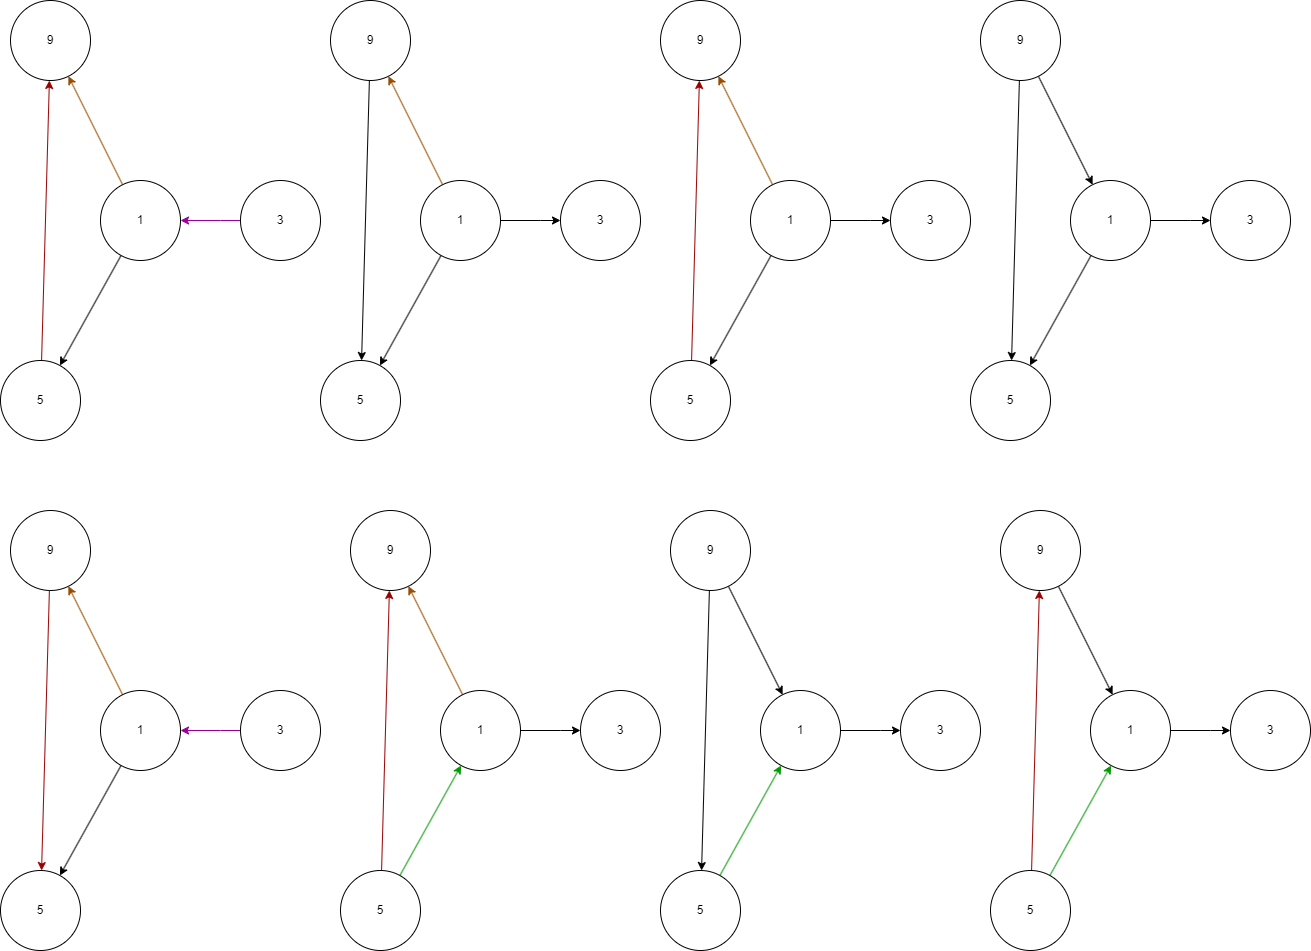

There are 6 and 8 distinct arrangements for the subgraphs, resulting in 48 different Markov equivalence classes. For the essential graph:


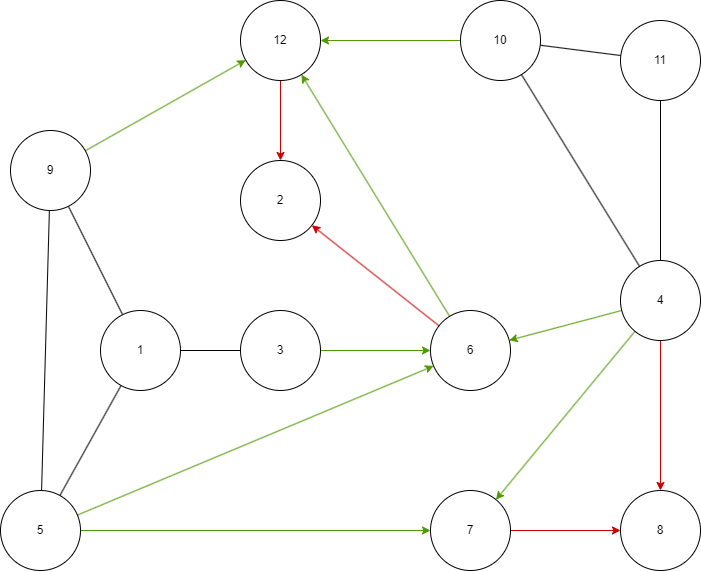

# Q4

The conditions for a mixed graph G to be an essential graph according to the theorem by Andersson, Madigan, and Perlman are:

D=G* for some DAG G iff:
1. D is a chain graph.
2. every arrow-free component of D is chordal.
3. no a->b-c- as induced subgraph.
4. all arrows are strongly protected.(edges cannot be reversed)

Let's break them:

1. A chain graph is a graph with no directed cycles and where the undirected components are complete subgraphs. To violate this, we need to introduce a directed cycle in our graph e.g.

 a -> b -> c -> a.
2. A chordal graph is one in which every cycle of four or more vertices has a chord. To violate this, we introduce a cycle of four or more vertices without a chord e.g.

 c - d - e - f - c.
3. no a→b-c! we add a→b-c e.g.

  b ->  d - e
4. Add unprotected arrow e.g.

  f -> h.



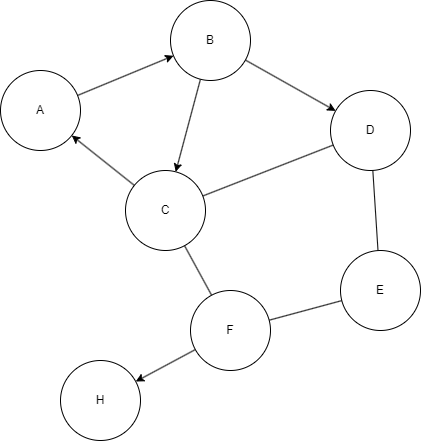

# Q5


## Q5.a

Start with a fully connected undirected graph among all variables. This means we have edges between all pairs of variables: A, B, C, D, E, F.


Then for each pair of nodes (X, Y) in the graph:
 If X and Y are independent given some subset S of their neighbors, remove the edge between X and Y.
Increase the size of S until either X and Y are found to be conditionally independent or there are no CI relations left


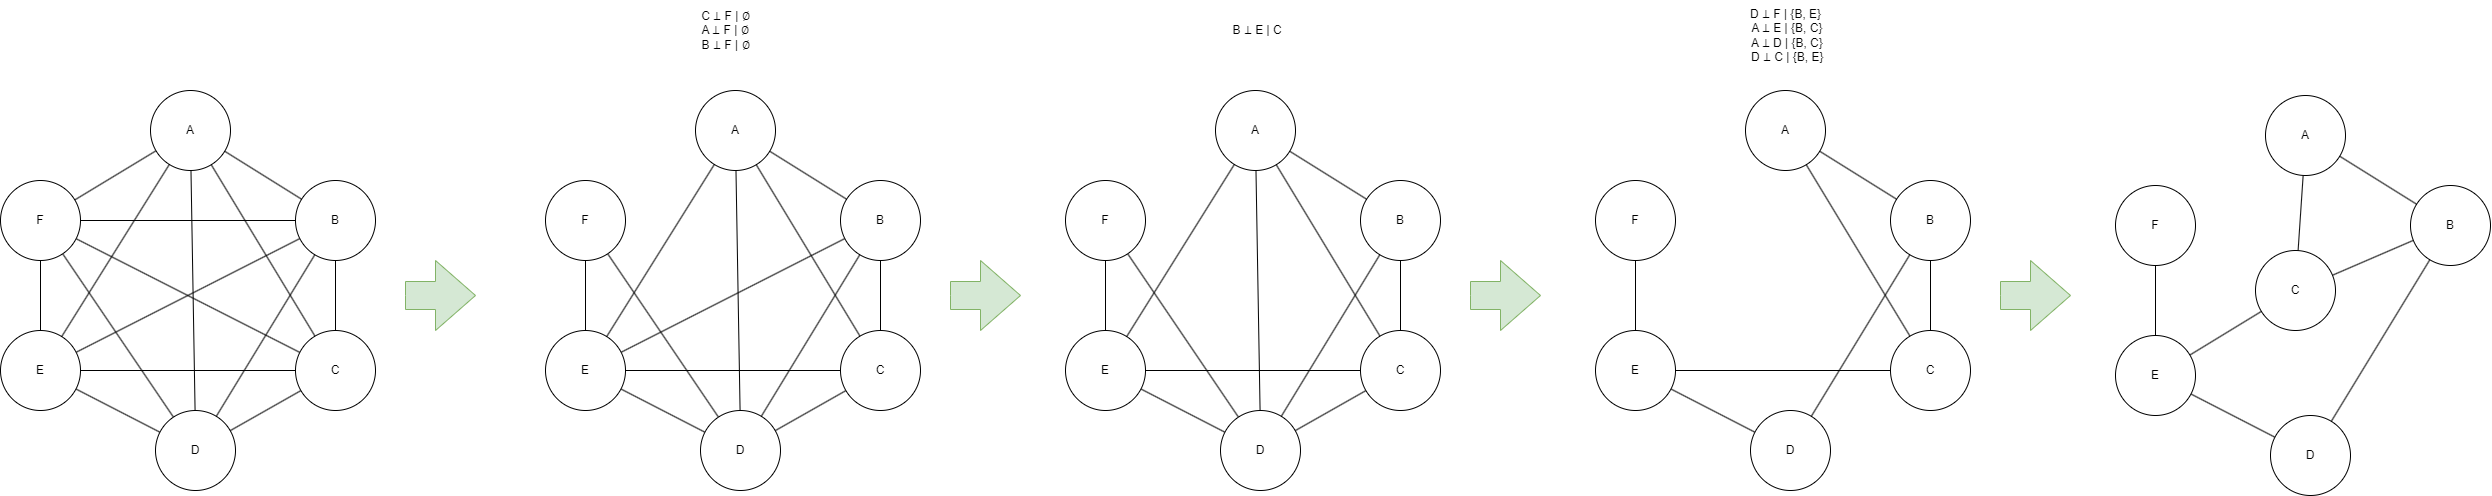

The final graph is the skeleton:

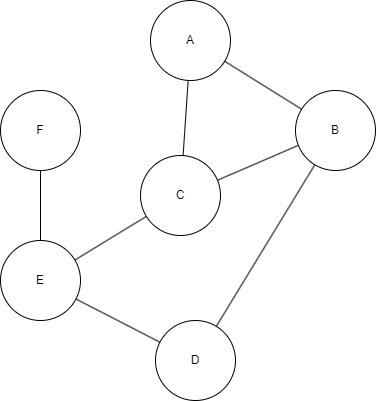

## Q5.b

We can identify the v-structures given CI relations in the following way:

For every path (X -Y- Z) in the skeleton. If Y is in the conditioning set of (X, Z) , then (X, Y, Z) is a v-structure with Y as the collider.

For each triplet X→Y-Z if (X, Z) are not adjacent connect Y→Z to avoid V-structures

Use 4 strongly protected configurations if applicable

For (C-E-F): (C, F) is not conditionally independent given E:

For (C-E-D): (C, D) is conditionally independent given E derived from D ⊥ C | {B, E}

For (B-D-E): (B, E) is not conditionally independent given D

For (C-B-D): (C, D) is conditionally independent given B derived from D ⊥ C | {B, E}

For (B-C-E): (B, E) is conditionally independent given C derived from B ⊥ E | C

For (B-A-B),  (A-B-C), and  (B-A-C) there exists no v-structure for the path (X-Y-Z) X and X are also adjacent with brakes the conduction for v-structure.

This gives the following graph:


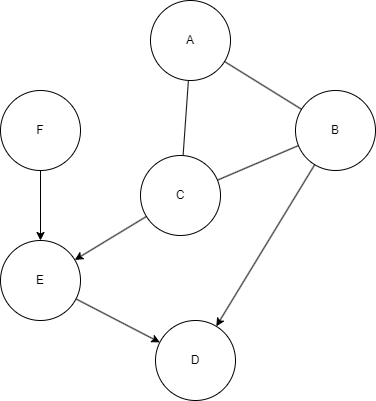

## Q5.c

No other edges are directed in the essential graph

# Q6


## Q6.a

Graph Gn = (V, E) where:

V = {(i, j) ∈ Z 2 ≥0 : 0 ≤ i ≤ n, 0 ≤ j ≤ n},

E = {{(i, j),(i + 1, j)} : 0 ≤ i < n, 0 ≤ j ≤ n} ∪ {{(i, j),(i, j + 1)} :
 0 ≤ i ≤ n, 0 ≤ j < n}.

Gives us an undirected Graph Gn:


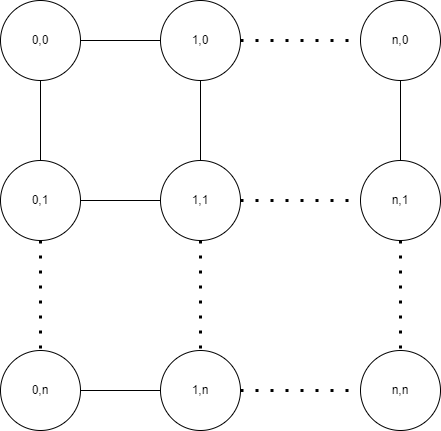

The width of a graph G with respect to an elimination order is the size of the largest clique minus one.

Consider the order in which we eliminate vertices from Gn.

Start by eliminating all vertices in the first column (0,y) for y=0,1,…,n.
Next, eliminate all vertices in the second column (1,y) for y=0,1,…,n.
Continue in this manner until all vertices in the n:th column are eliminated.

As we eliminate vertices, we must observe the largest clique formed. When eliminating any vertex (x,y) not on the boundary, the neighbors (x+1,y) and (x,y+1) will form a clique. This results in a clique of size 3. However, when we reach the (n-1):th column and start eliminating vertices, every vertex in this column will form a clique with the entire n:th  column, leading to cliques of size n+2. This is the largest clique we'll encounter.


Given that tree-width is largest clique minus one. The tree-width for Gn is equal to n + 1

## Q6.b

The computational complexity of VE is largely determined by the size of the biggest clique formed during elimination. Given that the tree-width of Gn is n+1, there are 2^n binary variables to consider. Therefore, the complexity scales as 2^(n+1), which is quite unfavorable.
For small values of n, using VE is practical since the computation remains manageable. However, as n increases, the rapidly growing computational demand makes VE a less desirable choice.


# Q7 (lacking time, no nice graphs)

Exact Inference via Clique-Tree Algorithm

Lets do it in folowing steps:
1. Moralize the given DAG, we need to add undirected edges between all pairs of nodes that have a common child but are not directly connected. Then, we can remove the direction from all the edges.
2. Make the moralized graph chordal, we need to ensure that every cycle of four or more nodes has a chord, which is an edge that is not part of the cycle but connects two nodes of the cycle.
3. Once we have a chordal graph, we can determine its cliques. A clique is a subset of nodes such that every two distinct nodes are adjacent.
4. Compute the joint potential functions for each clique
5. Message passing and computation of marginal distributions.

6. After computing the marginal distributions, we can determine the expected values E[Xi] for each species.

In [ ]:
import numpy as np

# 1. Moralization of the Graph

# 1 -> 4
# 1 -> 2
# 4 -> 5
# 2 -> 3
# 3 -> 5

# gives

# 1 - 4
# 1 - 2
# 4 - 5
# 2 - 3
# 3 - 5
# 3 - 4 (added due to common child 5)

# 2.  Chordal Cover

# 1 - 4
# 1 - 2
# 4 - 5
# 2 - 3
# 3 - 5
# 3 - 4 (added due to common child 5)
# 2 - 4 (triangulation)

# 3. Build Cliques

# Clique 1: {1, 2, 4}
# Clique 2: {2, 3, 5}
# Clique 3: {4, 5}

# Given conditional probabilities

# Potential for X1
p_X1 = np.array([1 - 0.75, 0.75])

# Potential for X2 given X1
p_X2_X1 = np.array([[1 - 0.7, 0.7],
                      [1 - 0.5, 0.5]])

# Potential for X3 given X2
p_X3_X2 = np.array([[1 - 0.75, 0.75],
                      [1 - 0.65, 0.65]])

# Potential for X4 given X1
p_X4_X1 = np.array([[1 - 0.8, 0.8],
                      [1 - 0.65, 0.65]])

# Potential for X5 given X2 and X4
p_X5_X2_X4 = np.array([[[1 - 0.4, 0.4],
                          [1 - 0.2, 0.2]],
                         [[1 - 0.3, 0.3],
                          [1 - 0.1, 0.1]]])


print("The potential functions given conditional probabilities:")
for name, p in zip(['X1', 'X2|X1', 'X3|X2', 'X4|X1', 'X5|X2,X4'], [p_X1, p_X2_X1, p_X3_X2, p_X4_X1, p_X5_X2_X4]):
    print(f'{name}:')
    print(p)
    print()



```
The potential functions given conditional probabilities:
X1:
[0.25 0.75]

X2|X1:
[[0.3 0.7]
 [0.5 0.5]]

X3|X2:
[[0.25 0.75]
 [0.35 0.65]]

X4|X1:
[[0.2  0.8 ]
 [0.35 0.65]]

X5|X2,X4:
[[[0.6 0.4]
  [0.8 0.2]]

 [[0.7 0.3]
  [0.9 0.1]]]
```



In [ ]:
#4. Compute the joint potential functions for each clique

# For Clique 1: {1, 2, 4}
psi_C1 = np.zeros((2, 2, 2))
for x1 in [0, 1]:
    for x2 in [0, 1]:
        for x4 in [0, 1]:
            psi_C1[x1, x2, x4] = p_X1[x1] * p_X2_X1[x1, x2] * p_X4_X1[x1, x4]

# For Clique 2: {2, 3, 5}
psi_C2 = np.zeros((2, 2, 2))
for x2 in [0, 1]:
    for x3 in [0, 1]:
        for x4 in [0, 1]:
            for x5 in [0, 1]:
                psi_C2[x2, x3, x5] += p_X3_X2[x2, x3] * p_X5_X2_X4[x2, x4, x5]

# For Clique 3: {4, 5}
psi_C3 = p_X5_X2_X4.sum(axis=0)  # Sum over X2 to get joint distribution of X4 and X5

psi_C1, psi_C2, psi_C3
for i, psi in enumerate([psi_C1, psi_C2, psi_C3]):
    print(f'ψC{i+1}:')
    print(psi)
    print()



```
ψC1:
[[[0.015   0.06   ]
  [0.035   0.14   ]]

 [[0.13125 0.24375]
  [0.13125 0.24375]]]

ψC2:
[[[0.35 0.15]
  [1.05 0.45]]

 [[0.56 0.14]
  [1.04 0.26]]]

ψC3:
[[1.3 0.7]
 [1.7 0.3]]
```



In [ ]:
# 5. Message passing and computation of marginal distributions

def normalize(arr):
    return arr / np.sum(arr)

# Pass messages between cliques

# Message from Clique 1 to Clique 2
# Marginalize over variables not in the separator {2}
message_C1_to_C2 = psi_C1.sum(axis=(0,2))
message_C1_to_C2 = normalize(message_C1_to_C2)

# Message from Clique 3 to Clique 2
# Marginalize over variables not in the separator {5}
message_C3_to_C2 = psi_C3.sum(axis=1)
message_C3_to_C2 = normalize(message_C3_to_C2)

# Update potentials of Cliques based on received messages
psi_C2_updated = psi_C2.copy()
for x2 in [0, 1]:
    for x3 in [0, 1]:
        for x5 in [0, 1]:
            psi_C2_updated[x2, x3, x5] *= message_C1_to_C2[x2] * message_C3_to_C2[x5]

# Compute the marginal distributions for each node
marginal_X1 = psi_C1.sum(axis=(1,2))
marginal_X2 = psi_C1.sum(axis=(0,2))
marginal_X3 = psi_C2_updated.sum(axis=(0,2))
marginal_X4 = psi_C1.sum(axis=(0,1))
marginal_X5 = psi_C2_updated.sum(axis=(0,1))

# Calculate the expected values E[Xi] for each species
E_X1 = marginal_X1[1]
E_X2 = marginal_X2[1]
E_X3 = marginal_X3[1]
E_X4 = marginal_X4[1]
E_X5 = marginal_X5[1]

E_X1, E_X2, E_X3, E_X4, E_X5
for i, x in enumerate([E_X1, E_X2, E_X3, E_X4, E_X5]):
    print(f'E[X{i+1}]={x:.3f}')




```
E[X1]=0.750
E[X2]=0.550
E[X3]=0.695
E[X4]=0.688
E[X5]=0.245
```



This means, for instance, that the tree of species 1 has a 75% probability of being classified as "tall". Similarly, the tree of species 5 has a 24.5% probability of being classified as "tall".